<a href="https://colab.research.google.com/github/Creatrohit9/ICBP2.0/blob/main/Rohit_Bhadauriya_ICBP_2_0_solution_book_for_Supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's dive into Feature Engineering with the help of the Carbon Footprint Optimization in Supply Chain Logistics Dataset.**

## **Problem Statement**

Carbon Footprint Optimization in Supply Chain Logistics
Traditional logistics systems prioritize cost and time, often neglecting environmental impact.
Develop a deep learning model that uses route data, fuel usage, weather, traffic, and cargo weight to
optimize delivery routes for minimal carbon emissions, helping companies make green logistics
decisions.
Sample Workflow
1. Data Collection from fleet management systems, weather APIs, or map services.
2. Data Preprocessing (normalization, missing value handling, encoding)
3. Model Training using supervised learning
4. Evaluation Metrics: MAE, RMSE, and % error on carbon prediction
5. Route Suggestion Engine that integrates predicted emissions with real-time route options


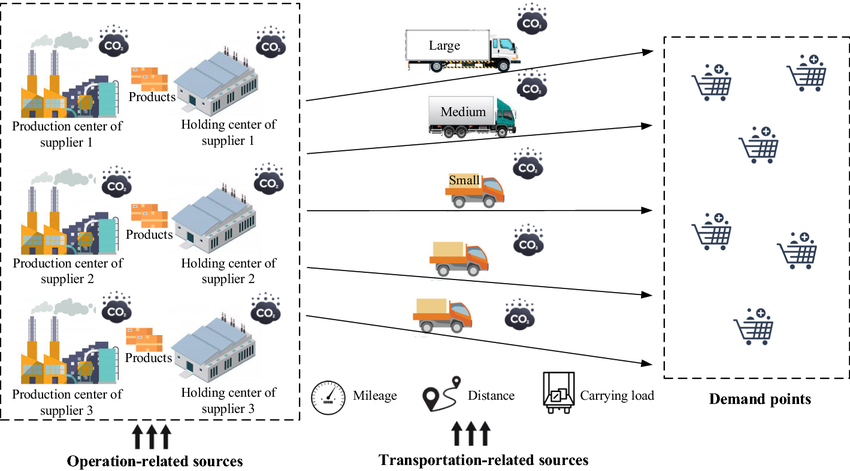

## **Dataset Information**

# Goal: Predict or recommend delivery routes that minimize carbon emissions, using:

Route data (GPS, distance, road type)

Fuel usage

Weather conditions

Traffic levels

Cargo weight

## **Importing**

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:

data_train = pd.read_csv('/content/drive/MyDrive/co2_emission_dataset.csv')

## **Dataset Inspection**

In [3]:
# First Look
data_train.head()

,route_id,distance_km,avg_speed_kmph,fuel_used_liters,weather_condition,traffic_level,cargo_weight_kg,vehicle_type,num_stops,elevation_gain_m,delivery_time_min,co2_emission_kg
0,1,380.794718,106.251292,292.485626,2,0,14899.191968,1,8,135.905890,1407.125843,22.262626
1,2,951.207163,74.506534,265.850967,1,0,18245.063330,0,15,49.421067,167.544960,29.344874
2,3,734.674002,47.591905,178.763290,1,1,15614.154260,0,3,240.028839,771.339630,24.174179
3,4,602.671899,96.297761,249.140266,1,2,2549.014797,1,13,196.356795,1051.453111,11.784442
4,5,164.458454,67.681032,185.722835,1,0,25039.035821,1,9,148.093666,1014.957678,30.398717


In [12]:
data_train.columns

Index(['route_id', 'distance_km', 'avg_speed_kmph', 'fuel_used_liters',
       'weather_condition', 'traffic_level', 'cargo_weight_kg', 'vehicle_type',
       'num_stops', 'elevation_gain_m', 'delivery_time_min',
       'co2_emission_kg'],
      dtype='object')

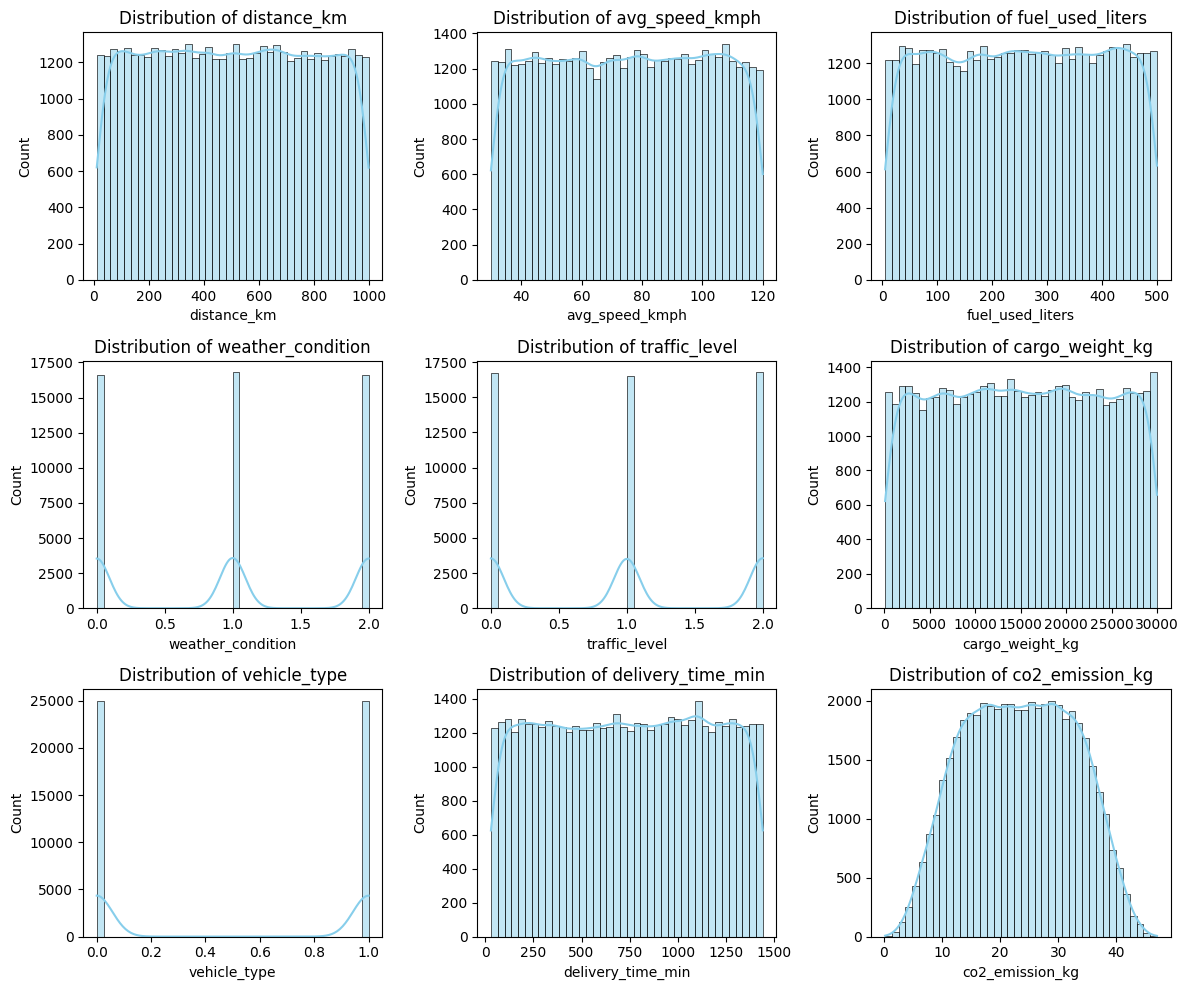

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_column=data_train[['distance_km','avg_speed_kmph','fuel_used_liters','weather_condition','traffic_level','cargo_weight_kg','vehicle_type', 'delivery_time_min',
       'co2_emission_kg']]

# Plot distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_column, 1):
    plt.subplot(3, 3,i)
    sns.histplot(data_train[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [4]:
df_lines = pd.read_csv('/content/drive/MyDrive/fleet_weather_map_india_summer.csv')

In [ ]:
df_lines.head()

,Unnamed: 0,DATE,OrderNumber,SKU,PCS,ReferenceID,Location,Alley_Number,Cellule,Coord,AlleyCell
0,0,12/11/2018,3780678,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119
1,1,12/11/2018,3780650,340308,1,340308,A0721204,A07,21,"[32.5, 22.5]",A0721
2,2,12/11/2018,3780649,399573,1,399573,A1119504,A11,19,"[19.5, 21.0]",A1119
3,3,12/11/2018,3780645,442025,1,442025,A0706401,A07,6,"[31.25, 10.5]",A0706
4,4,12/11/2018,3780638,436455,1,436455,A0216107,A02,16,"[47.5, 18.0]",A0216


In [ ]:
data_train.shape

(50000, 13)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VehicleID          50000 non-null  object 
 1   Timestamp          50000 non-null  object 
 2   Latitude           50000 non-null  float64
 3   Longitude          50000 non-null  float64
 4   Speed_kmph         50000 non-null  float64
 5   Fuel_Level_%       50000 non-null  float64
 6   Temp_C             50000 non-null  float64
 7   Humidity_%         50000 non-null  float64
 8   Wind_Speed_kmph    50000 non-null  float64
 9   Weather_Condition  50000 non-null  object 
 10  Location           50000 non-null  object 
 11  Road_Type          50000 non-null  object 
 12  Traffic_Level      50000 non-null  object 
dtypes: float64(7), object(6)
memory usage: 5.0+ MB


## bewlow are the numerical columns which help us for in statistical decision making
 2   Latitude           50000 non-null  float64
 3   Longitude          50000 non-null  float64
 4   Speed_kmph         50000 non-null  float64
 5   Fuel_Level_%       50000 non-null  float64
 6   Temp_C             50000 non-null  float64
 7   Humidity_%         50000 non-null  float64
 8   Wind_Speed_kmph    50000 non-null  float64

In [ ]:
data_train.describe(include='all')

,VehicleID,Timestamp,Latitude,Longitude,Speed_kmph,Fuel_Level_%,Temp_C,Humidity_%,Wind_Speed_kmph,Weather_Condition,Location,Road_Type,Traffic_Level
count,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000,50000,50000
unique,20,29694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,10,3,3
top,V1002,4/26/2025 3:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partly Cloudy,Kolkata,Rural,Low
freq,2592,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10054,5118,16718,16855
mean,NaN,NaN,20.889625,77.798474,49.970858,60.004570,38.060294,49.894530,15.026708,NaN,NaN,NaN,NaN
std,NaN,NaN,5.319671,4.503737,15.088560,19.582125,4.653787,19.161419,4.974867,NaN,NaN,NaN,NaN
min,NaN,NaN,12.971600,72.571400,0.000000,0.000000,30.000000,10.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,17.385000,73.856700,39.800000,46.600000,34.600000,36.400000,11.700000,NaN,NaN,NaN,NaN
50%,NaN,NaN,19.076000,77.594600,50.000000,60.200000,38.000000,49.900000,15.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,26.846700,80.270700,60.100000,73.700000,41.400000,63.400000,18.400000,NaN,NaN,NaN,NaN


## **Thought Process**

What actually will drive the CO2 emmision?

1.Sustainable supply chain optimization is an approach to network design that combines cost-effectiveness with environmental responsibility.

It highlights the complexities that arise when businesses attempt to reconcile environmental considerations with profit objectives..

2.Balancing cost efficiency with CO2 emission reduction is a complex task that requires careful planning and strategic decision-making.


3.



## **Handling Missing Data**

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = data_train.columns[data_train.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data_train[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data_train[show_missing()].isnull().sum().sort_values(ascending = False)/len(data_train)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [ ]:
# Functions to address missing data

# Explore features
def feat_explore(column):
    return data_train[column].value_counts()

# Function to impute missing values
def feat_impute(column, value):
    data_train.loc[data_train[column].isnull(),column] = value

In [ ]:
data_train.columns

Index(['VehicleID', 'Timestamp', 'Latitude', 'Longitude', 'Speed_kmph',
       'Fuel_Level_%', 'Temp_C', 'Humidity_%', 'Wind_Speed_kmph',
       'Weather_Condition', 'Location', 'Road_Type', 'Traffic_Level'],
      dtype='object')

# **Handling Outliers**

In [ ]:
# find categorical variables
categorical = [var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 6 categorical variables


In [ ]:
# find Numerical variables
numerical = [var for var in data_train.columns if data_train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


In [ ]:
discrete = []
for var in numerical:
    if len(data_train[var].unique())<20:
        print(var, ' values: ', data_train[var].unique())
        discrete.append(var)

print('There are {} discrete variables'.format(len(discrete)))

Latitude  values:  [28.7041 26.9124 19.076  26.8467 22.5726 13.0827 18.5204 17.385  12.9716
 23.0225]
Longitude  values:  [77.1025 75.7873 72.8777 80.9462 88.3639 80.2707 73.8567 78.4867 77.5946
 72.5714]
There are 2 discrete variables


In [ ]:
continuous = [var for var in numerical if var not in discrete and var not in ['VehicleID', 'Traffic_Level']]

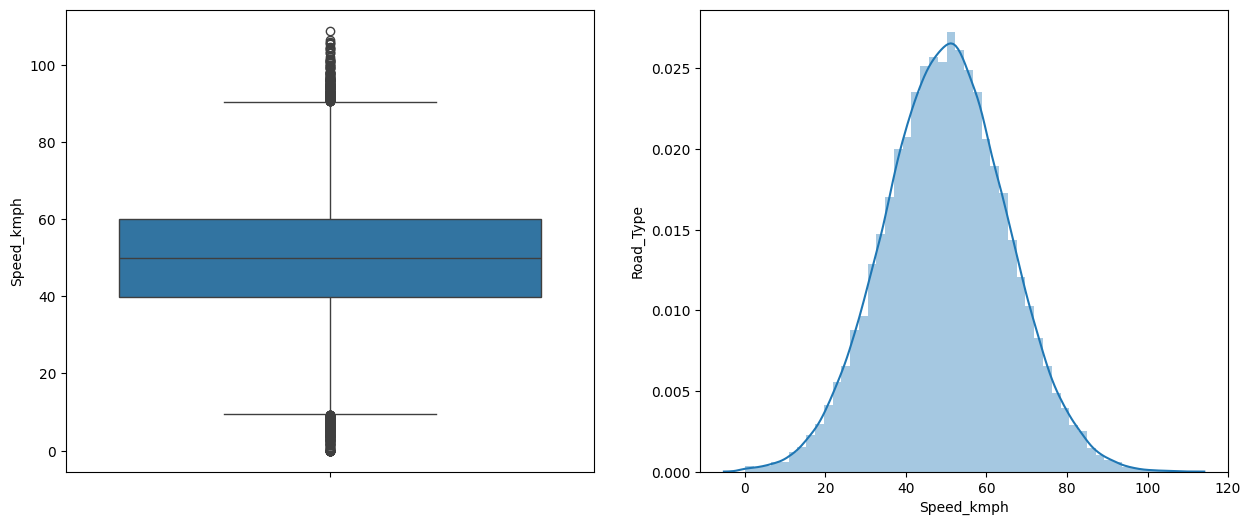

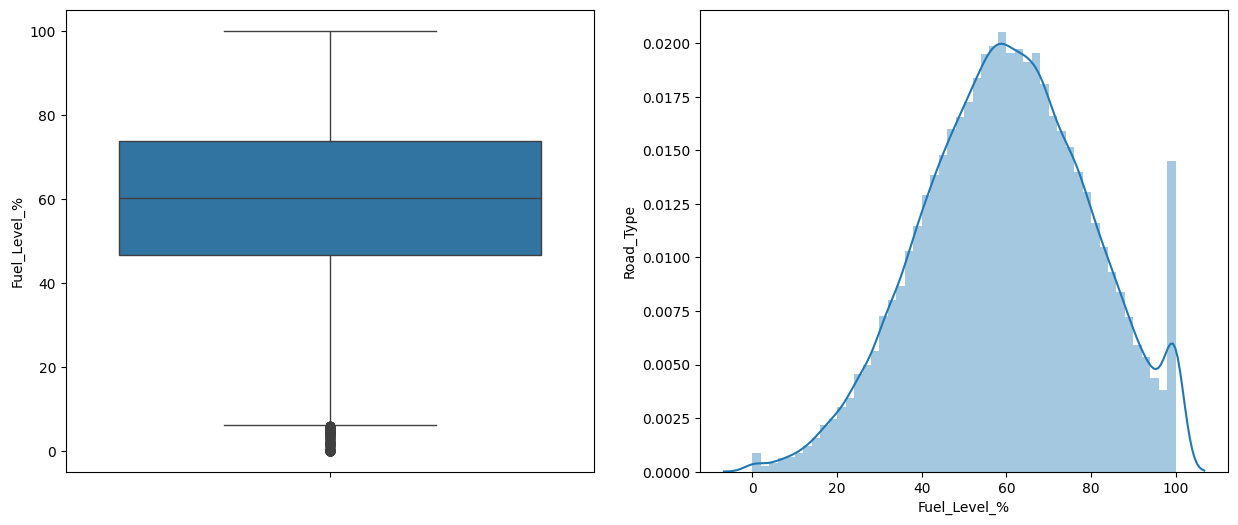

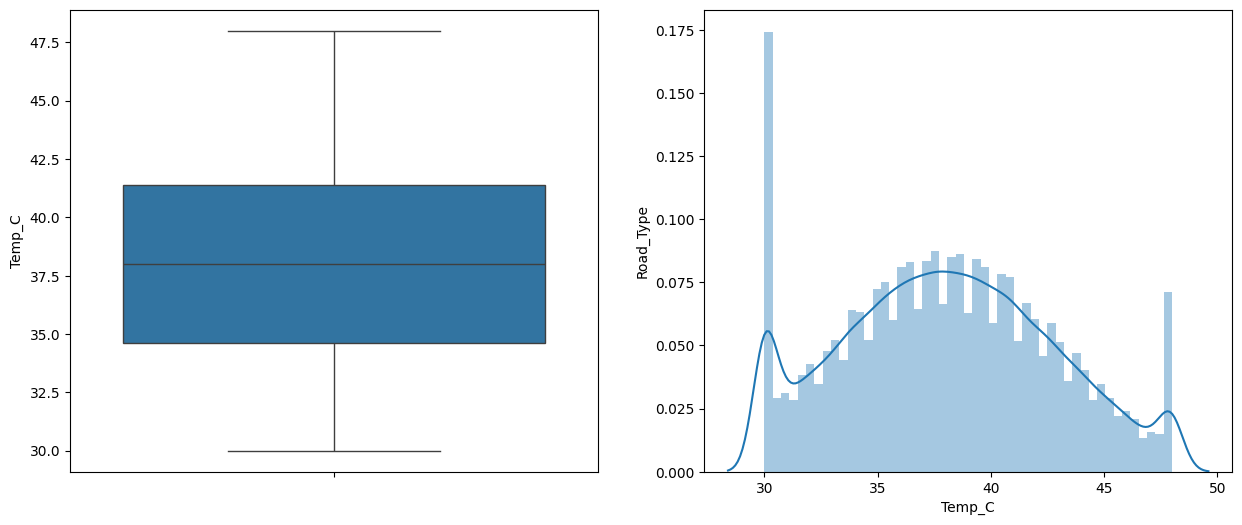

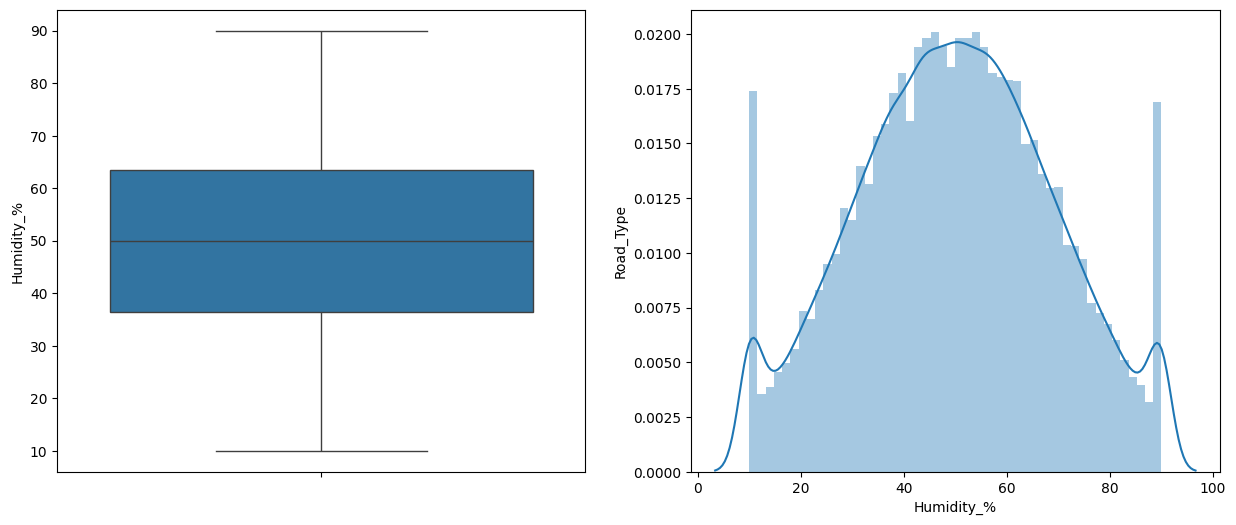

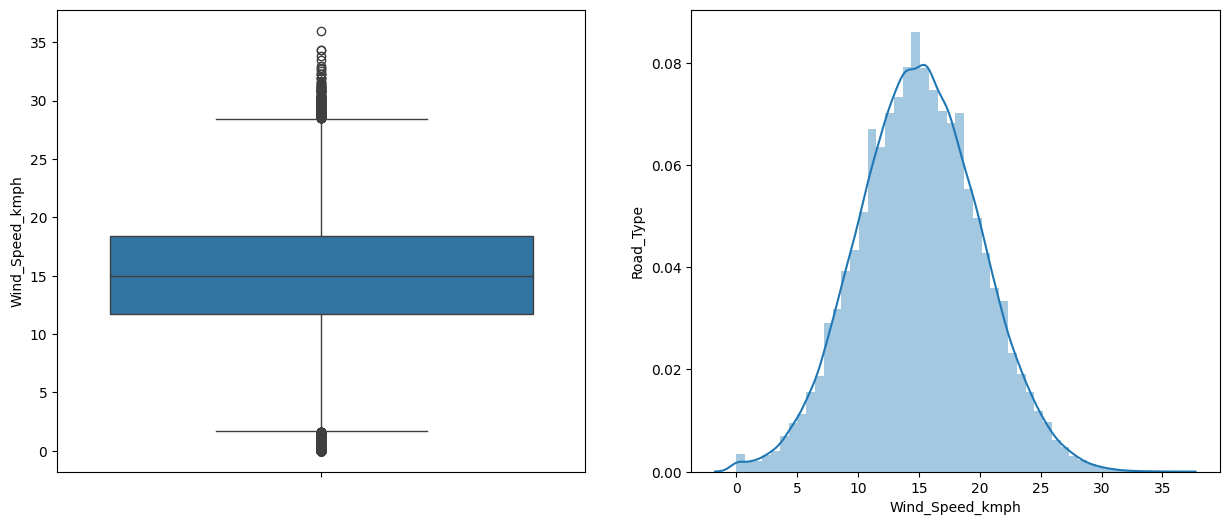

In [ ]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data_train[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(data_train[var].dropna())
    fig.set_ylabel('Road_Type')
    fig.set_xlabel(var)

    plt.show()

## **Binning**

In [ ]:
#OverallQual
bins = [0, 5, 7,10]
pd.cut(data_train['Speed_kmph'], bins).value_counts()

,count
Speed_kmph,
"(7, 10]",86
"(0, 5]",56
"(5, 7]",45


In [ ]:
data_train['Speed_kmph_binned'] = pd.cut(data_train['Speed_kmph'], bins)

## **Reducing cardinality**

In [ ]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories.
#This may be a problem for some machine learning models.
for var in categorical:
    print(var, ' contains ', len(data_train[var].unique()), ' labels')

VehicleID  contains  20  labels
Timestamp  contains  29694  labels
Weather_Condition  contains  5  labels
Location  contains  10  labels
Road_Type  contains  3  labels
Traffic_Level  contains  3  labels


In [ ]:
# import requests

# headers = {
#     'Authorization': 'Bearer YOUR_API_KEY'
# }
# response = requests.get('https://api.samsara.com/v1/fleet/vehicles', headers=headers)
# data = response.json()

In [ ]:
# !pip install osmnx networkx matplotlib numpy


Goal: Predict or recommend delivery routes that minimize carbon emissions, using:

Route data (GPS, distance, road type)

Fuel usage

Weather conditions

Traffic levels

Cargo weight

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load road network for an Indian city
place_name = "Pune, India"
G = ox.graph_from_place(place_name, network_type='drive')
# G = ox.simplify_graph(G)

# Pick nodes
orig_node = list(G.nodes())[100]
dest_node = list(G.nodes())[300]

# Add synthetic emissions data
for u, v, k, data in G.edges(keys=True, data=True):
    distance_km = data.get('length', 100) / 1000
    cargo_weight_kg = np.random.choice([200, 500, 1000])
    traffic_factor = np.random.choice([0.8, 1.0, 1.3])
    base_emission_rate = 0.25  # g CO₂/km/kg
    emission = base_emission_rate * distance_km * cargo_weight_kg * traffic_factor
    data['emission'] = emission

# Find the greenest route
path = nx.shortest_path(G, source=orig_node, target=dest_node, weight='emission')
emission_total = nx.path_weight(G, path, weight='emission')

# Plot the route
ox.plot_graph_route(G, path, route_linewidth=4, node_size=0, bgcolor='white')

print(f"Total predicted CO₂ emissions for route: {emission_total:.2f} g")


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model

# Numeric inputs
fuel_input = Input(shape=(1,), name='fuel_usage')
distance_input = Input(shape=(1,), name='distance')
weight_input = Input(shape=(1,), name='cargo_weight')

# Categorical inputs
weather_input = Input(shape=(1,), name='weather')
traffic_input = Input(shape=(1,), name='traffic')
road_input = Input(shape=(1,), name='road_type')

# Embedding layers
weather_emb = Embedding(input_dim=5, output_dim=2)(weather_input)  # adjust input_dim
traffic_emb = Embedding(input_dim=3, output_dim=2)(traffic_input)
road_emb = Embedding(input_dim=3, output_dim=2)(road_input)

# Flatten embeddings
weather_flat = Flatten()(weather_emb)
traffic_flat = Flatten()(traffic_emb)
road_flat = Flatten()(road_emb)

# Concatenate all features
x = Concatenate()([
    fuel_input, distance_input, weight_input,
    weather_flat, traffic_flat, road_flat
])

# Dense layers
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear', name='emissions')(x)

# Build model
model = Model(
    inputs=[fuel_input, distance_input, weight_input,
            weather_input, traffic_input, road_input],
    outputs=output
)

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


In [ ]:
import networkx as nx

# Sample graph
G = nx.DiGraph()

# Add edges: (node1, node2, attributes)
G.add_edge('A', 'B', distance=5, traffic='Moderate', weather='Sunny', weight_kg=500)
G.add_edge('B', 'C', distance=7, traffic='High', weather='Sunny', weight_kg=500)
# ...

# Predict emissions for each edge using your deep model
for u, v, data in G.edges(data=True):
    features = {
        'fuel_usage': estimate_fuel(data['distance'], data['traffic']),
        'distance': data['distance'],
        'cargo_weight': data['weight_kg'],
        'weather': encode_weather(data['weather']),
        'traffic': encode_traffic(data['traffic']),
        'road_type': encode_road('Urban')  # example
    }
    emission = model.predict([np.array([[features[k]]]) for k in features])[0][0]
    data['emission'] = emission

# Now use Dijkstra with emissions as weights
shortest_path = nx.dijkstra_path(G, source='A', target='C', weight='emission')


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from utils.routing.distances import (
	distance_picking,
	next_location
)
from utils.routing.routes import (
	create_picking_route
)
from utils.batch.mapping_batch import (
	orderlines_mapping,
	locations_listing
)
from utils.cluster.mapping_cluster import (
	df_mapping
)
from utils.batch.simulation_batch import (
	simulation_wave,
	simulate_batch
)
from utils.cluster.simulation_cluster import(
	loop_wave,
	simulation_cluster,
	create_dataframe,
	process_methods
)
from utils.results.plot import (
	plot_simulation1,
	plot_simulation2
)
import streamlit as st
# from streamlit import caching

# Set page configuration
st.set_page_config(page_title ="Improve Warehouse Productivity using Order Batching",
                    initial_sidebar_state="expanded",
                    layout='wide',
                    page_icon="🛒")

# Set up the page
@st.cache(persist=False,
          allow_output_mutation=True,
          suppress_st_warning=True,
          show_spinner= True)
# Preparation of data
def load(filename, n):
    df_orderlines = pd.read_csv(IN + filename).head(n)
    return df_orderlines


# Alley Coordinates on y-axis
y_low, y_high = 5.5, 50
# Origin Location
origin_loc = [0, y_low]
# Distance Threshold (m)
distance_threshold = 35
distance_list = [1] + [i for i in range(5, 100, 5)]
IN = 'static/in/'
# Store Results by WaveID
list_wid, list_dst, list_route, list_ord, list_lines, list_pcs, list_monomult = [], [], [], [], [], [], []
list_results = [list_wid, list_dst, list_route, list_ord, list_lines, list_pcs, list_monomult]	# Group in list
# Store Results by Simulation (Order_number)
list_ordnum , list_dstw = [], []

# Simulation 1: Order Batch
# SCOPE SIZE
st.header("**🥇 Impact of the wave size in orders (Orders/Wave) **")
st.subheader('''
        🛠️ HOW MANY ORDER LINES DO YOU WANT TO INCLUDE IN YOUR ANALYSIS?
    ''')
col1, col2 = st.beta_columns(2)
with col1:
	n = st.slider(
				'SIMULATION 1 SCOPE (THOUSDAND ORDERS)', 1, 200 , value = 5)
with col2:
	lines_number = 1000 * n
	st.write('''🛠️{:,} \
		order lines'''.format(lines_number))
# SIMULATION PARAMETERS
st.subheader('''
        🛠️ SIMULATE ORDER PICKING BY WAVE OF N ORDERS PER WAVE WITH N IN [N_MIN, N_MAX] ''')
col_11 , col_22 = st.beta_columns(2)
with col_11:
	n1 = st.slider(
				'SIMULATION 1: N_MIN (ORDERS/WAVE)', 0, 20 , value = 1)
	n2 = st.slider(
				'SIMULATION 1: N_MAX (ORDERS/WAVE)', n1 + 1, 20 , value = int(np.max([n1+1 , 10])))
with col_22:
		st.write('''[N_MIN, N_MAX] = [{:,}, {:,}]'''.format(n1, n2))
# START CALCULATION
start_1= False
if st.checkbox('SIMULATION 1: START CALCULATION',key='show', value=False):
    start_1 = True
# Calculation
if start_1:
	df_orderlines = load('df_lines.csv', lines_number)
	df_waves, df_results = simulate_batch(n1, n2, y_low, y_high, origin_loc, lines_number, df_orderlines)
	plot_simulation1(df_results, lines_number)

# Simulation 2: Order Batch using Spatial Clustering
# SCOPE SIZE
st.header("**🥈 Impact of the order batching method **")
st.subheader('''
        🛠️ HOW MANY ORDER LINES DO YOU WANT TO INCLUDE IN YOUR ANALYSIS?
    ''')
col1, col2 = st.beta_columns(2)
with col1:
	n_ = st.slider(
				'SIMULATION 2 SCOPE (THOUSDAND ORDERS)', 1, 200 , value = 5)
with col2:
	lines_2 = 1000 * n_
	st.write('''🛠️{:,} \
		order lines'''.format(lines_2))
# START CALCULATION
start_2 = False
if st.checkbox('SIMULATION 2: START CALCULATION',key='show_2', value=False):
    start_2 = True
# Calculation
if start_2:
	df_orderlines = load('df_lines.csv', lines_2)
	df_reswave, df_results = simulation_cluster(y_low, y_high, df_orderlines, list_results, n1, n2,
			distance_threshold)
	plot_simulation2(df_reswave, lines_2, distance_threshold)